# PyCUDA与图像处理-直方图

In [1]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda.compiler import SourceModule
import string
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [2]:
def load_kernel_from_file(fname,kname):
    sources = None
    kernel = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read() # 通过str函数转换为unicode编码
        sm = SourceModule(str(sources))
        kernel = sm.get_function(kname)
    return kernel

def load_kernel_from_string(sources,kname):
    sm = SourceModule(str(sources))
    kernel = sm.get_function(kname)
    return kernel

In [10]:
histogram = load_kernel_from_file('../../datas/cuda/07-histogram.cu','histogram')
histogram_optimized = load_kernel_from_file('../../datas/cuda/07-histogram.cu','histogram_optimized')

C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu
c:\program files\nvidia gpu computing toolkit\cuda\v9.0\include\crt\math_functions.h: warning C4819: The file contains a character that cannot be represented in the current code page (936). Save the file in Unicode format to prevent data loss
c:\program files\nvidia gpu computing toolkit\cuda\v9.0\include\crt\math_functions.h(838): warning C4819: The file contains a character that cannot be represented in the current code page (936). Save the file in Unicode format to prevent data loss
c:\program files\nvidia gpu computing toolkit\cuda\v9.0\include\crt\math_functions.h(1772): warning C4819: The file contains a character that cannot be represented in the current code page (936). Save the file in Unicode format to prevent data loss
c:\program files\nvidia gpu computing toolkit\cuda\v9.0\include\crt\math_functions.h(2628): warning C4819: The file

In [11]:
src = cv2.imread('../../datas/f2.jpg',0)

In [12]:
histval = np.zeros((256,),np.int32)

In [13]:
rows,cols = src.shape
block = (32,32,1)
grid = (int(cols / block[0] ),int(rows / block[1]),1)

print('block = ',block)
print('grid = ',grid)

block =  (32, 32, 1)
grid =  (20, 15, 1)


In [14]:
histogram(drv.In(src),drv.Out(histval),grid=grid,block=block)

Text(0.5,1,'Histogram')

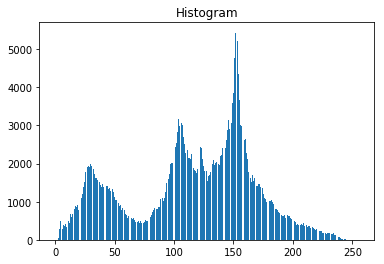

In [15]:
plt.bar(np.arange(0,256),histval)
plt.title('Histogram')

In [28]:
length = rows * cols
block = (32,32,1)
grid = (int(cols / block[0]),int(rows / block[1]), 1)

In [29]:
hashval = np.zeros((256,),np.int32)
histogram_optimized(drv.In(src),np.int32(length),drv.Out(histval),grid=grid,block=block)

Text(0.5,1,'Histogram')

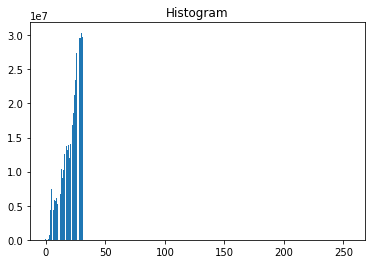

In [30]:
plt.bar(np.arange(0,256),histval)
plt.title('Histogram')

In [21]:
print(histval)

[   6144    2048    3072   43008  291840  494592  287744  387072  374784
  411648  349184  496640  452608  696320  601088  687104  836608  913408
  878592  927744  801792  940032 1126400 1242112 1412096 1566720 1827840
 1951744 1976320 1969152 2025472 1983488       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0   